# Figure S6

In [1]:

from scipy.integrate import odeint, solve_ivp, lsoda
from scipy.optimize import minimize
from scipy.optimize import curve_fit
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



import scipy.optimize
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as tkr
import scipy.stats as st
from scipy.stats import scoreatpercentile

from scipy.integrate import odeint, solve_ivp, lsoda
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from lmfit import Parameters, minimize, Model, report_fit, conf_interval
from sklearn.metrics import mean_squared_error

import glob

def significance_stars(p_value):
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return 'ns'
#import Aspartic_Fitter as fitter
#

# Asthetics

In [2]:
colors = [  "#56B4E9", "#009E73", "#CC79A7", "#999999", "#E69F00","#DB2B39", "#0076A1", "#0072B2", "#1A5042","#0C1713", "#6A6969"]
palette = sns.color_palette(colors)
n = 1

sns.set_theme(context='notebook', style='ticks', font='Arial', 
              font_scale=1.3, 
              rc={"lines.linewidth": n, 'axes.linewidth':n, 
                                  "xtick.major.width":n,"ytick.major.width":n}, 
              palette = palette)
sns.color_palette(colors)

[(0.33725490196078434, 0.7058823529411765, 0.9137254901960784),
 (0.0, 0.6196078431372549, 0.45098039215686275),
 (0.8, 0.4745098039215686, 0.6549019607843137),
 (0.6, 0.6, 0.6),
 (0.9019607843137255, 0.6235294117647059, 0.0),
 (0.8588235294117647, 0.16862745098039217, 0.2235294117647059),
 (0.0, 0.4627450980392157, 0.6313725490196078),
 (0.0, 0.4470588235294118, 0.6980392156862745),
 (0.10196078431372549, 0.3137254901960784, 0.25882352941176473),
 (0.047058823529411764, 0.09019607843137255, 0.07450980392156863),
 (0.41568627450980394, 0.4117647058823529, 0.4117647058823529)]

In [31]:
def monoexponential(x, A, k, B):
    """
    Compute the value of a monoexponential function at point x.
    
    Args:
        x (float): The input value.
        A (float): Amplitude or initial value.
        k (float): Decay constant or growth rate.
    
    Returns:
        float: The value of the monoexponential function at point x.
    """
    return B + (A * np.exp(-k * x))
def fit_monoexponential_Yield(df, column="Conversion_1"):
    """
    Fit monoexponential curve to a specified column in the dataframe.
    
    Args:
        df (pd.DataFrame): DataFrame containing 'time' and conversion data.
        column (str): Column name for conversion data (e.g., 'Conversion_1' or 'Conversion_2').

    Returns:
        pd.DataFrame: Fitted parameters (A, k, B) and their uncertainties.
    """
    t = df["time"].values
    y = df[column].values

    # Initial guess: A=100, k=0.5, B=mean of final two values
    p0 = [100, 0.5, y[-2:].mean()]

    # Fit data to monoexponential function
    popt, pcov = curve_fit(monoexponential, t, y, p0=p0)

    # Calculate uncertainties
    perr = np.sqrt(np.diag(pcov))

    return pd.DataFrame({column: popt, f"{column}_err": perr}, index=["A", "k", "B"])

def fit_monoexponential_two_Azides_Yield(df):
    t = df["time"].values
    azide1 = df["Conversion_1"].values
    azide2 = df["Conversion_2"].values

    # Fit data to monoexponential function
    popt1, pcov1 = curve_fit(monoexponential, t, azide1, p0=[100, 0.5, azide1[-2:].mean()])
    popt2, pcov2 = curve_fit(monoexponential, t, azide2, p0=[100, 0.5, azide2[-2:].mean()])

    # Calculate uncertainties
    perr1 = np.sqrt(np.diag(pcov1))
    perr2 = np.sqrt(np.diag(pcov2))

    return pd.DataFrame({"Azide1": popt1, "Azide1_err": perr1, "Azide2": popt2, "Azide2_err": perr2}, index=["A", "k", "B"])



In [32]:
df1 = pd.read_csv("Kinetics_KR_NaCl.csv")


[Text(0.5, 0, ''),
 Text(0, 0.5, ''),
 (-10.0, 120.0)]

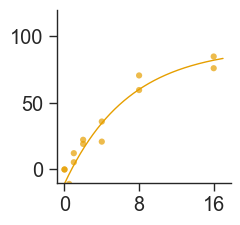

In [33]:
fit = fit_monoexponential_Yield(df1, column="Conversion_1")
x_sim = np.linspace(0, 17, 1000)
y_sim = monoexponential(x_sim, fit["Conversion_1"].iloc[0], fit["Conversion_1"].iloc[1], fit["Conversion_1"].iloc[2])

fig, ax = plt.subplots(figsize = (2.25,2.25), dpi = 100)


sns.scatterplot(data = df1, x = "time", y = "Conversion_1", ax = ax, 
            edgecolor = "none", s = 20, legend = False, 
            color = "C4", alpha = 0.7)

ax.plot(x_sim, y_sim, c = "C4")
sns.despine(fig, left=False, bottom=False)


ax.set(xlabel = "", ylabel = "", xticks = np.linspace(0, 16, 3), yticks = np.linspace(0, 100, 3), ylim = (-10, 120))

[Text(0.5, 0, ''),
 Text(0, 0.5, ''),
 (-10.0, 120.0)]

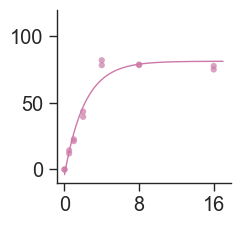

In [35]:
df2 = pd.read_csv("Kinetics_Cys_NaCl.csv")
fit = fit_monoexponential_Yield(df2, column="Conversion_2")
x_sim = np.linspace(0, 17, 1000)
y_sim = monoexponential(x_sim, fit["Conversion_2"].iloc[0], fit["Conversion_2"].iloc[1], fit["Conversion_2"].iloc[2])

fig, ax = plt.subplots(figsize = (2.25,2.25), dpi = 100)


sns.scatterplot(data = df2, x = "time", y = "Conversion_2", ax = ax, 
            edgecolor = "none", s = 20, legend = False, 
            color = "C2", alpha = 0.7)

ax.plot(x_sim, y_sim, c = "C2")
sns.despine(fig, left=False, bottom=False)


ax.set(xlabel = "", ylabel = "", xticks = np.linspace(0, 16, 3), yticks = np.linspace(0, 100, 3), ylim = (-10, 120))


[Text(0.5, 0, ''),
 Text(0, 0.5, ''),
 (-10.0, 120.0)]

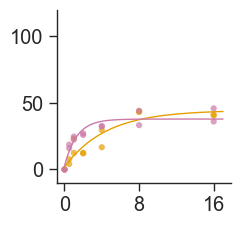

In [36]:
df3 = pd.read_csv("Kinetics_Cys_KR_NaCl.csv")

fit = fit_monoexponential_two_Azides_Yield(df3)
x_sim = np.linspace(0, 17, 1000)
y_sim = monoexponential(x_sim, fit["Azide1"].iloc[0], fit["Azide1"].iloc[1], fit["Azide1"].iloc[2])
y_sim2 = monoexponential(x_sim, fit["Azide2"].iloc[0], fit["Azide2"].iloc[1], fit["Azide2"].iloc[2])    

fig, ax = plt.subplots(figsize = (2.25,2.25), dpi = 100)


sns.scatterplot(data = df3, x = "time", y = "Conversion_1", ax = ax, 
            edgecolor = "none", s = 20, legend = False, 
            color = "C4", alpha = 0.7)

sns.scatterplot(data = df3, x = "time", y = "Conversion_2", ax = ax, 
            edgecolor = "none", s = 20, legend = False, 
            color = "C2", alpha = 0.7)


ax.plot(x_sim, y_sim, c = "C4")
ax.plot(x_sim, y_sim2, c = "C2")
sns.despine(fig, left=False, bottom=False)


ax.set(xlabel = "", ylabel = "", xticks = np.linspace(0, 16, 3), yticks = np.linspace(0, 100, 3), ylim = (-10, 120))